<a href="https://colab.research.google.com/github/sidharth0909/Encryptix/blob/main/SMS_Spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

This Project is about SMS-Spam-Detection, In this project i have used Naive Bayes model for prediction. Apart from the basic stuff i had understood the following new topics from this project

1. NLTK - Natural Language Toolkit
It is a platform for building Python programs to work with human language data
for more click on this link - https://www.nltk.org/

2. Porter Stemmer - It applies a series of rules to remove common suffixes from English words.Example: "running" -> "run", "happier" -> "happi".

3. PUNKT -
Punkt is a pre-trained model that helps in sentence segmentation and tokenization. Tokenization is the process of splitting text into individual words or sentences.
for more - https://www.nltk.org/api/nltk.tokenize.punkt.html

4. wordcloud - Combines all the text documents into a single string.
Uses WordCloud to generate and visualize the most frequent words.

# The Necessaries

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
100% 211k/211k [00:00<00:00, 404kB/s]
100% 211k/211k [00:00<00:00, 404kB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/sms-spam-collection-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

**IMPORT LIBRARIES**

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
from sklearn.naive_bayes import MultinomialNB

In [6]:
spam = pd.read_csv('spam.csv',  encoding='ISO-8859-1')

**BASIC COMMANDS**

In [8]:
spam.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
spam.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [12]:
spam.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [13]:
spam.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [14]:
spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [15]:
spam.isnull().sum()

v1    0
v2    0
dtype: int64

In [16]:
spam.duplicated().sum()

403

In [17]:
spam.drop_duplicates(inplace=True)

In [18]:
spam.shape

(5169, 2)

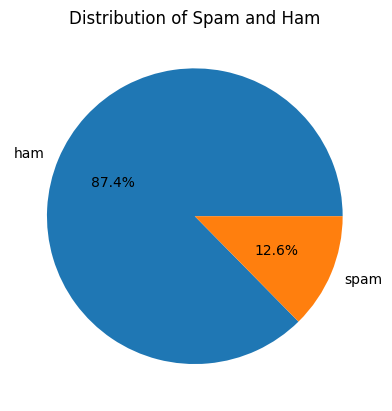

In [53]:
# PLOT THE DISTRIBUTION OF 'V1'
import matplotlib.pyplot as plt
plt.pie(spam['v1'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%')
plt.title('Distribution of Spam and Ham')
plt.show()

**Label Encoder**

In [19]:
from sklearn.preprocessing import LabelEncoder


In [20]:
encoder = LabelEncoder()

In [21]:
spam['v1'] = encoder.fit_transform(spam['v1']) # here ham = 0 and Spam = 1

In [22]:
spam

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [23]:
spam['v1'].value_counts()

v1
0    4516
1     653
Name: count, dtype: int64

NLTK
1. Stopwords
2. Punkt

In [24]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Here Data is preprocessed.
1. Removal of Stop words
2. Changing the words to lower case
3. Removing special characters and punctuation
4. Stemming : to reduce words to their base or root form

In [25]:
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    ps = PorterStemmer()
    stemmed_text = [ps.stem(word) for word in filtered_text]
    return ' '.join(stemmed_text)
spam['v2'] = spam['v2'].apply(preprocess_text)

In [55]:
from wordcloud import WordCloud
# Combines all the text documents into a single string.
# Uses WordCloud to generate and visualize the most frequent words.

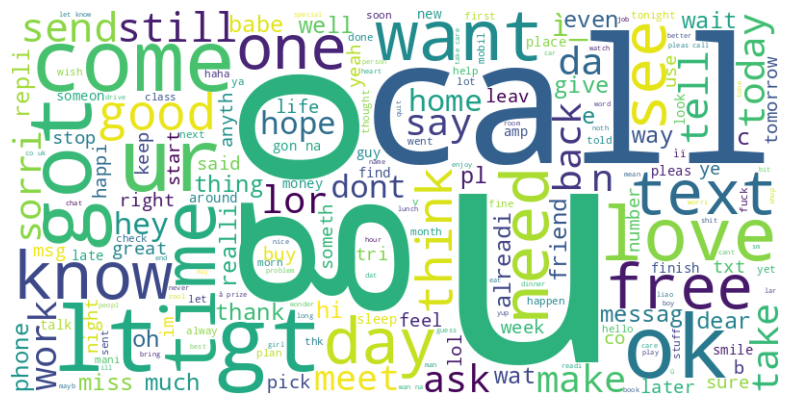

In [58]:
text_column = spam["v2"]

text = ' '.join(text_column.dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Splitting the Data

In [26]:
X = spam['v2']
y = spam['v1']
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train1)
X_test = vectorizer.transform(X_test1)

In [28]:
X_train

<4135x6354 sparse matrix of type '<class 'numpy.int64'>'
	with 34237 stored elements in Compressed Sparse Row format>

In [29]:
y_train

2228    0
5529    0
2149    0
5058    1
5051    0
       ..
4740    0
474     0
3266    0
4016    0
879     1
Name: v1, Length: 4135, dtype: int64

# **The Model**

In [30]:
SMS = MultinomialNB()
SMS.fit(X_train, y_train)

MultinomialNB()

In [31]:
y_pred_train = SMS.predict(X_train)
y_pred_test = SMS.predict(X_test)

In [33]:
Train_acc = accuracy_score(y_train, y_pred_train)
Test_acc = accuracy_score(y_test, y_pred_test)

In [34]:
Train_pre = precision_score(y_train, y_pred_train)
Test_pre = precision_score(y_test, y_pred_test)

In [39]:
Train_martix = confusion_matrix(y_train, y_pred_train)
Test_martix = confusion_matrix(y_test, y_pred_test)

In [36]:
Train_f1 = f1_score(y_train, y_pred_train)
Test_f1 = f1_score(y_test, y_pred_test)

In [37]:
Train_recall = recall_score(y_train, y_pred_train)
Test_recall = recall_score(y_test, y_pred_test)

Report

In [40]:
print("Train Accuracy:", Train_acc)
print("Test Accuracy:", Test_acc)
print("Train Precision:", Train_pre)
print("Test Precision:", Test_pre)

Train Accuracy: 0.9934703748488513
Test Accuracy: 0.9825918762088974
Train Precision: 0.9762376237623762
Test Precision: 0.9568345323741008


In [41]:
print("Train Confusion Matrix:")
print(Train_martix)
print("Test Confusion Matrix:")
print(Test_martix)

Train Confusion Matrix:
[[3615   12]
 [  15  493]]
Test Confusion Matrix:
[[883   6]
 [ 12 133]]


In [42]:
print("Train F1 Score:", Train_f1)
print("Test F1 Score:", Test_f1)

Train F1 Score: 0.9733464955577492
Test F1 Score: 0.936619718309859


In [43]:
print("Train Recall:", Train_recall)
print("Test Recall:", Test_recall)

Train Recall: 0.9704724409448819
Test Recall: 0.9172413793103448


In [44]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       889
           1       0.96      0.92      0.94       145

    accuracy                           0.98      1034
   macro avg       0.97      0.96      0.96      1034
weighted avg       0.98      0.98      0.98      1034



References:
1. https://www.kaggle.com/code/pruthvikmachhi
2. https://youtu.be/V8KKMNFSakE?si=iGpPXfkj_ZZQpHj5